In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Validacion modelo
Muchos modelos lo hacen muy bien con los datos que ha usado, pero despues falla con nuevos datos (overfiting); para evitar eso dividimos el set entre entrenamiento y validadcion (training y test).
Hay otros metodos como el cross validation que veremos mas tarde

In [3]:
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data_ads = pd.read_csv(url2)
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [7]:
a = np.random.randn(len(data_ads))

(array([ 1.,  5., 10., 24., 36., 43., 43., 24.,  7.,  7.]),
 array([-3.29645844, -2.7079326 , -2.11940677, -1.53088094, -0.9423551 ,
        -0.35382927,  0.23469657,  0.8232224 ,  1.41174823,  2.00027407,
         2.5887999 ]),
 <a list of 10 Patch objects>)

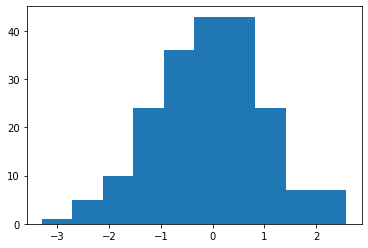

In [8]:
plt.hist(a)

In [9]:
 check = (a<0.8)
 training = data_ads[check]
 test = data_ads[~check] 

In [10]:
print(len(training),len(test))

160 40


In [11]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     642.8
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.44e-76
Time:                        18:07:09   Log-Likelihood:                -312.72
No. Observations:                 160   AIC:                             631.4
Df Residuals:                     157   BIC:                             640.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7986      0.346      8.081      0.000       2.115       3.483
TV             0.0457      0.002     28.744      0.000       0.043       0.049
Radio          0.1896      0.009     20.241      0.000       0.171       0.208
==============================================================================
Omnibus:                       54.939   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.579
Skew:                          -1.433   Prob(JB):                     2.98e-31
Kurtosis:                       6.589   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

vemos que todos los parametros (R2,pvalue, prob(f-satitics), etc) son muy buenos

### validacion del modelo con el conjunto de testing

In [15]:
sales_pred = lm.predict(test)
# suma cuadrado de las diferencias
SSD = sum((test["Sales"]-sales_pred)**2)
# desviacion estandar de los residuos
RSE = np.sqrt(SSD/(len(test)-2-1))

print(SSD, RSE)

91.85536406032206 1.5756196898476902


In [16]:
sales_mean = np.mean(test["Sales"])
error = RSE/sales_mean
# el porcentaje que no se puede explicar
error

0.11686406006658187

### Datos a tener en cuenta en la regresion
* R^2
* R^2 ajustado
* estadistico f (fisher) un incremento del estadistico, cuando añadimos nueva variable, es positivo
* p_valor (cuando menor sea mejor)
* RSE (la desviacion estandar de los residuos): deberia bajar cuando añadimos mas variables
* error (porcentaje que no se puede explicar): igual que antes ,deberia bajar a medida que añadimos variables

### Regresion linear con sklearn
vamos a ver con sklearn lo mismo que antes ,y como el programa de forma automatica elige las variables adecuadas para la regresion. Solamente tenemos que decirle cuantas variables quieres usar, y el va jugando con ellas para ver cuales son las buenas (recurse feature elminiation y svr)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [18]:
data = data_ads.copy()
feature_cols = ["TV","Radio","Newspaper"]
X = data[feature_cols]
Y = data["Sales"]

In [19]:
# indicamos que queremos un modelo lineal, el numero de variables (2) y en un solo paso (step=1)
estimator = SVR(kernel="linear")
selector = RFE(estimator,2,step=1)
selector = selector.fit(X,Y)


In [20]:
# aqui vemos cuaales se han usado (no se usa newspaper)
selector.support_

array([ True,  True, False])

In [21]:
from sklearn.linear_model import LinearRegression
X_pred = X[["TV","Radio"]]
lm = LinearRegression()
lm.fit(X_pred,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
display(lm.intercept_, lm.coef_) # vemos los coeficientes ( ordenada origen y coeficiengte)

2.921099912405138

array([0.04575482, 0.18799423])

In [24]:
# valor de R^2
lm.score(X_pred,Y)

0.8971942610828956

### Variables categoricas   

In [27]:
url4 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ecom-expense/Ecom%20Expense.csv"
df = pd.read_csv(url4)
df.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [28]:
# creamos variables dummy para las categoricas
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [29]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [30]:
# usamos join para juntarlos (usamos columns names para no afectar al df original ?)
columns_names = df.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [31]:
df_new = df[columns_names].join(dummy_gender)
columns_name = df_new.columns.values.tolist()
df_new.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [32]:
df_new = df_new[columns_name].join(dummy_city_tier)
df_new.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [41]:
# decidimos que variables queremos usar (ojo tambien podemos usar sklearn, como vimos antes svr y sfe)
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male",
                "City_Tier 1","City_Tier 2","City_Tier 3","Record"]

In [42]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [43]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [45]:
# para ver los coeficientes
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554695),
 ('City_Tier 1', 76.76432601049535),
 ('City_Tier 2', 55.138974309232445),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [46]:
lm.score(X,Y)

0.9179923586131016

In [ ]:
# podemos añadir mas variables y vamos jugando con ellos

### summary de sklearn manual

In [47]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [49]:
total_spend_pred = lm.predict(X)

In [50]:
regression_results(Y,total_spend_pred)

explained_variance:  0.918
mean_squared_log_error:  0.0562
r2:  0.918
MAE:  682.4664
MSE:  642563.0759
RMSE:  801.6003


In [57]:
# manual, suma de los cuadrados de la diferencia (SSD)
SSD = np.sum((total_spend_pred-Y)**2)
SSD

1517733985.340816

In [58]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [59]:
sales_mean = np.mean(Y)
sales_mean

6163.176415976714

In [60]:
error = RSE/sales_mean
print("El porcentajes de error que no se puede explicar es :",error*100)

El porcentajes de error que no se puede explicar es : 13.031135680294161


In [ ]:
# las prediciones estan 803 (desviacion estandar de los residuos) por encima/debajo de la media 6163 lo cual es mas o menos aceptables

In [64]:
### ahora usamos stadmodel
import statsmodels.api as sm
Xs = sm.add_constant(X)
model = sm.OLS(Y,Xs)
results = model.fit()
results.params

const               -43.318435
Monthly Income        0.147539
Transaction Time      0.154946
Gender_Female      -152.684231
Gender_Male         109.365796
City_Tier 1          62.324848
City_Tier 2          40.699496
City_Tier 3        -146.342779
Record              772.233446
dtype: float64

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Spend   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     4394.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:25:06   Log-Likelihood:                -19145.
No. Observations:                2362   AIC:                         3.830e+04
Df Residuals:                    2355   BIC:                         3.834e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -43.3184     29.550     -1.466      0.143    -101.266      14.629
Monthly Income       0.1475      0.002     71.753      0.000       0.144       0.152
Transaction Time     0.1549      0.058      2.678      0.007       0.041       0.268
Gender_Female     -152.6842     22.033     -6.930      0.000    -195.891    -109.478
Gender_Male        109.3658     22.316      4.901      0.000      65.606     153.126
City_Tier 1         62.3248     25.108      2.482      0.013      13.089     111.560
City_Tier 2         40.6995     25.263      1.611      0.107      -8.841      90.240
City_Tier 3       -146.3428     25.719     -5.690      0.000    -196.777     -95.909
Record             772.2334      5.359    144.111      0.000     761.725     782.741
==============================================================================
Omnibus:                      342.099   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.310
Skew:                           0.573   Prob(JB):                     1.43e-43
Kurtosis:                       2.168   Cond. No.                     1.55e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
stat_pred = results.predict(Xs)

In [70]:
SSD1 = np.sum((Y-stat_pred)**2)
SSD1

1517733985.3408165

In [71]:
RSE1 = np.sqrt(SSD1/(len(df_new)-len(feature_cols)-1))
RSE1

803.1318809818166